In [1]:
import sys
ABS_ROOT_DIR_PATH = '/home/rutkowski/dissertation/' #'/host/dissertation/'
if ABS_ROOT_DIR_PATH not in sys.path:
    sys.path.append(ABS_ROOT_DIR_PATH)

from common.exploration import print_count_and_percentage_stats
import numpy as np

In [2]:
q = np.load('q.npy')
phi = np.load('phi.npy')
pt = np.load('pt.npy')

validation_split = 0.2
validation_len = int(validation_split*len(q))

In [3]:
print_count_and_percentage_stats(q, 'q', tail_filter=validation_len)

q - training set stats
counts:     {-1.0: 4071, 1.0: 4098}
percentage: {-1.0: 49.83, 1.0: 50.17}

q - validation set stats
counts:     {-1.0: 807, 1.0: 826}
percentage: {-1.0: 49.42, 1.0: 50.58}


In [4]:
points_3 = np.load('points_3.npy')
print(np.shape(points_3))
points_10 = np.load('points_10.npy')
print(np.shape(points_10))

(8169, 3)
(8169, 10)


## potecjalnie porównanie danych testujących i walidujących

In [5]:
from common.utils import validation_set, train_set
import matplotlib.pyplot as plt
import matplotlib.ticker as tick

def plot_histogram(values, label, bins=20, dpi=100, ylim=None):
    
    train_data = train_set(values)
    valid_data = validation_set(values)
    
    fig, ax1 = plt.subplots()
    fig.set_dpi(dpi)
     
    ax1.hist(train_data, edgecolor = 'black', weights=np.ones(len(train_data)) / len(train_data), alpha=0.5, lw=0.5, bins=bins, label='training set')
    ax1.hist(valid_data, edgecolor = 'black', weights=np.ones(len(valid_data)) / len(valid_data), alpha=0.5, lw=0.5, bins=bins, label='validation set')
    ax1.yaxis.set_major_formatter(tick.PercentFormatter(1))
    ax1.set_xlabel(f'{label} value')
    ax1.set_ylabel('occurrences percentage')
    ax1.grid(axis='y', linestyle='--', linewidth=0.5)
    ax1.legend(loc='upper right')
    if ylim:
        ax1.set_ylim((0,ylim/100.))
    
    # fig.legend(ncol=2, loc='upper center', borderaxespad=1)
    plt.show()

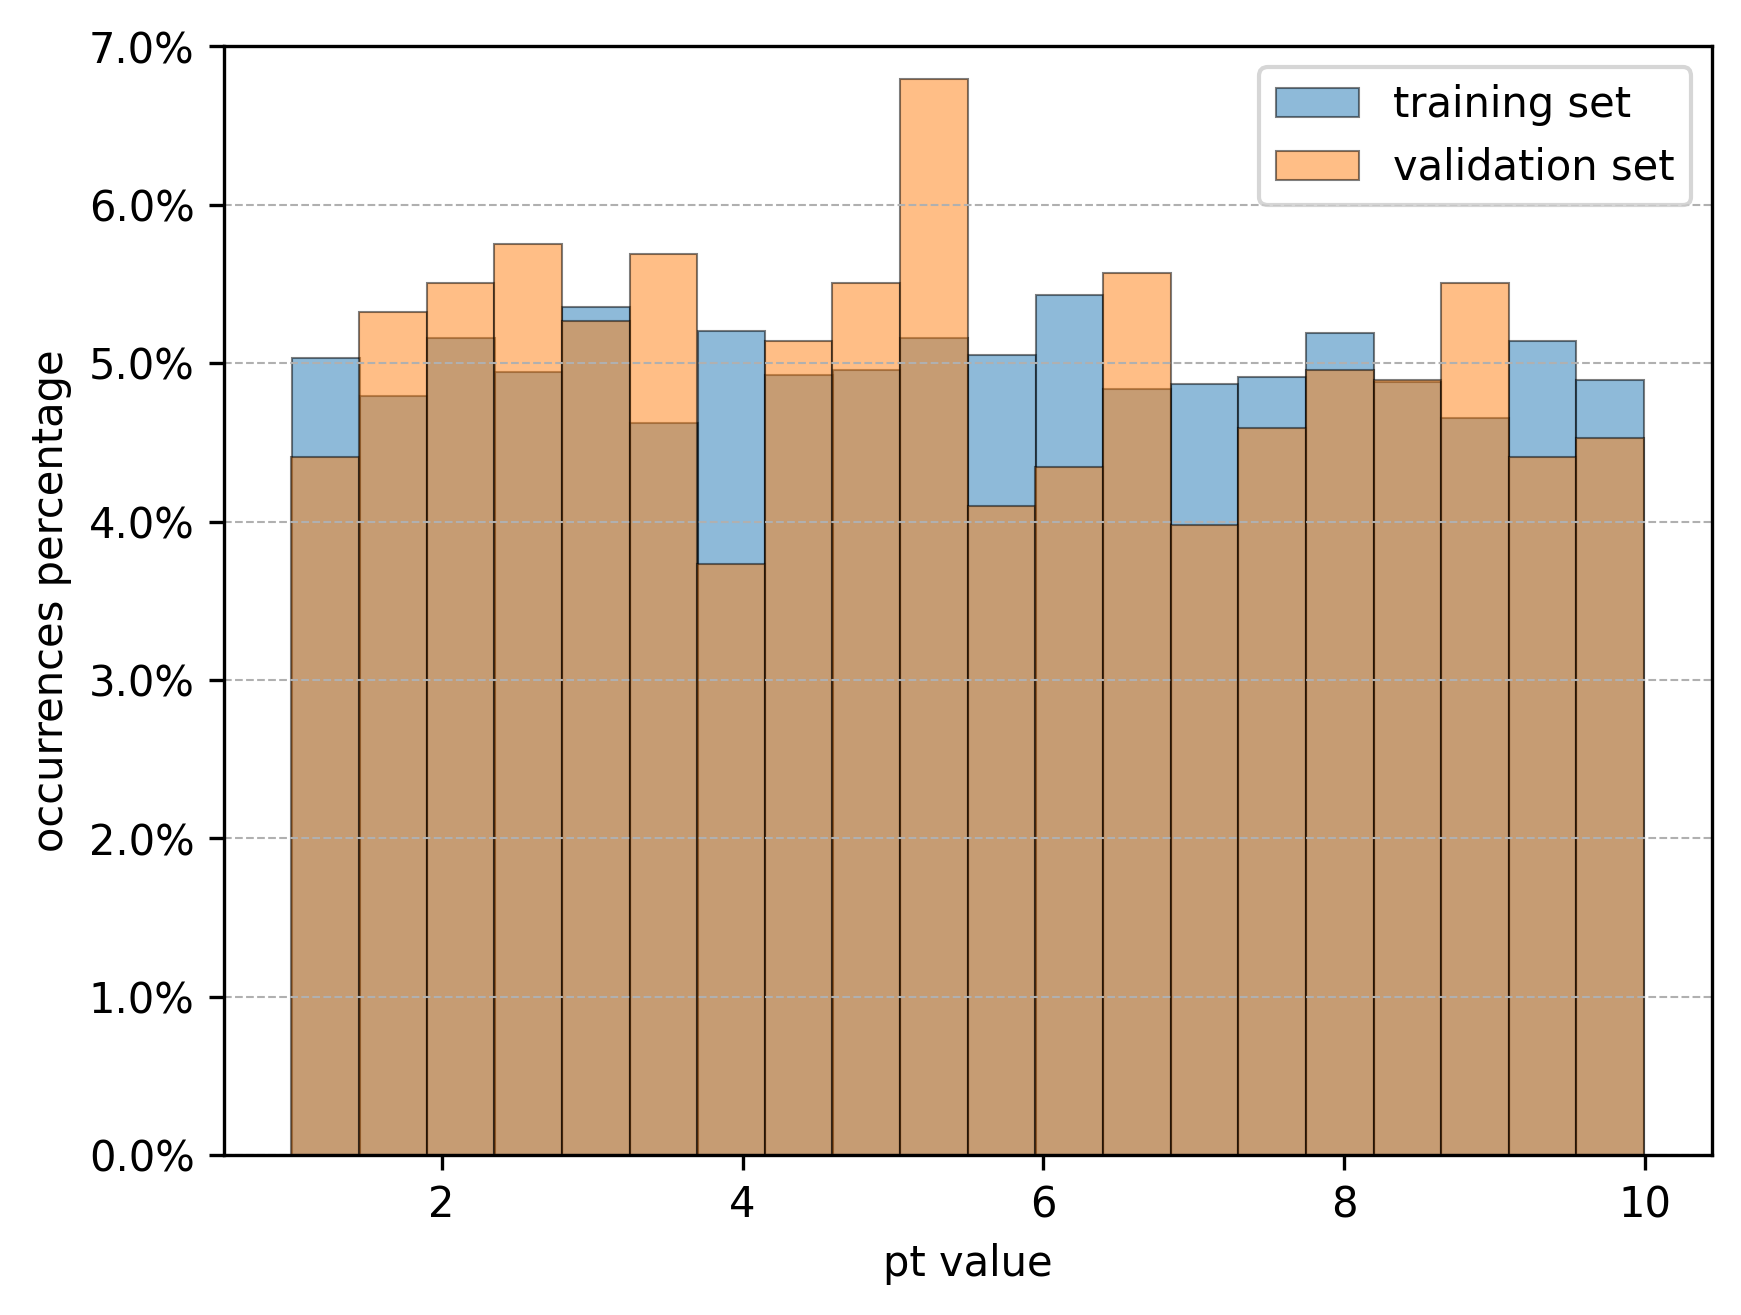

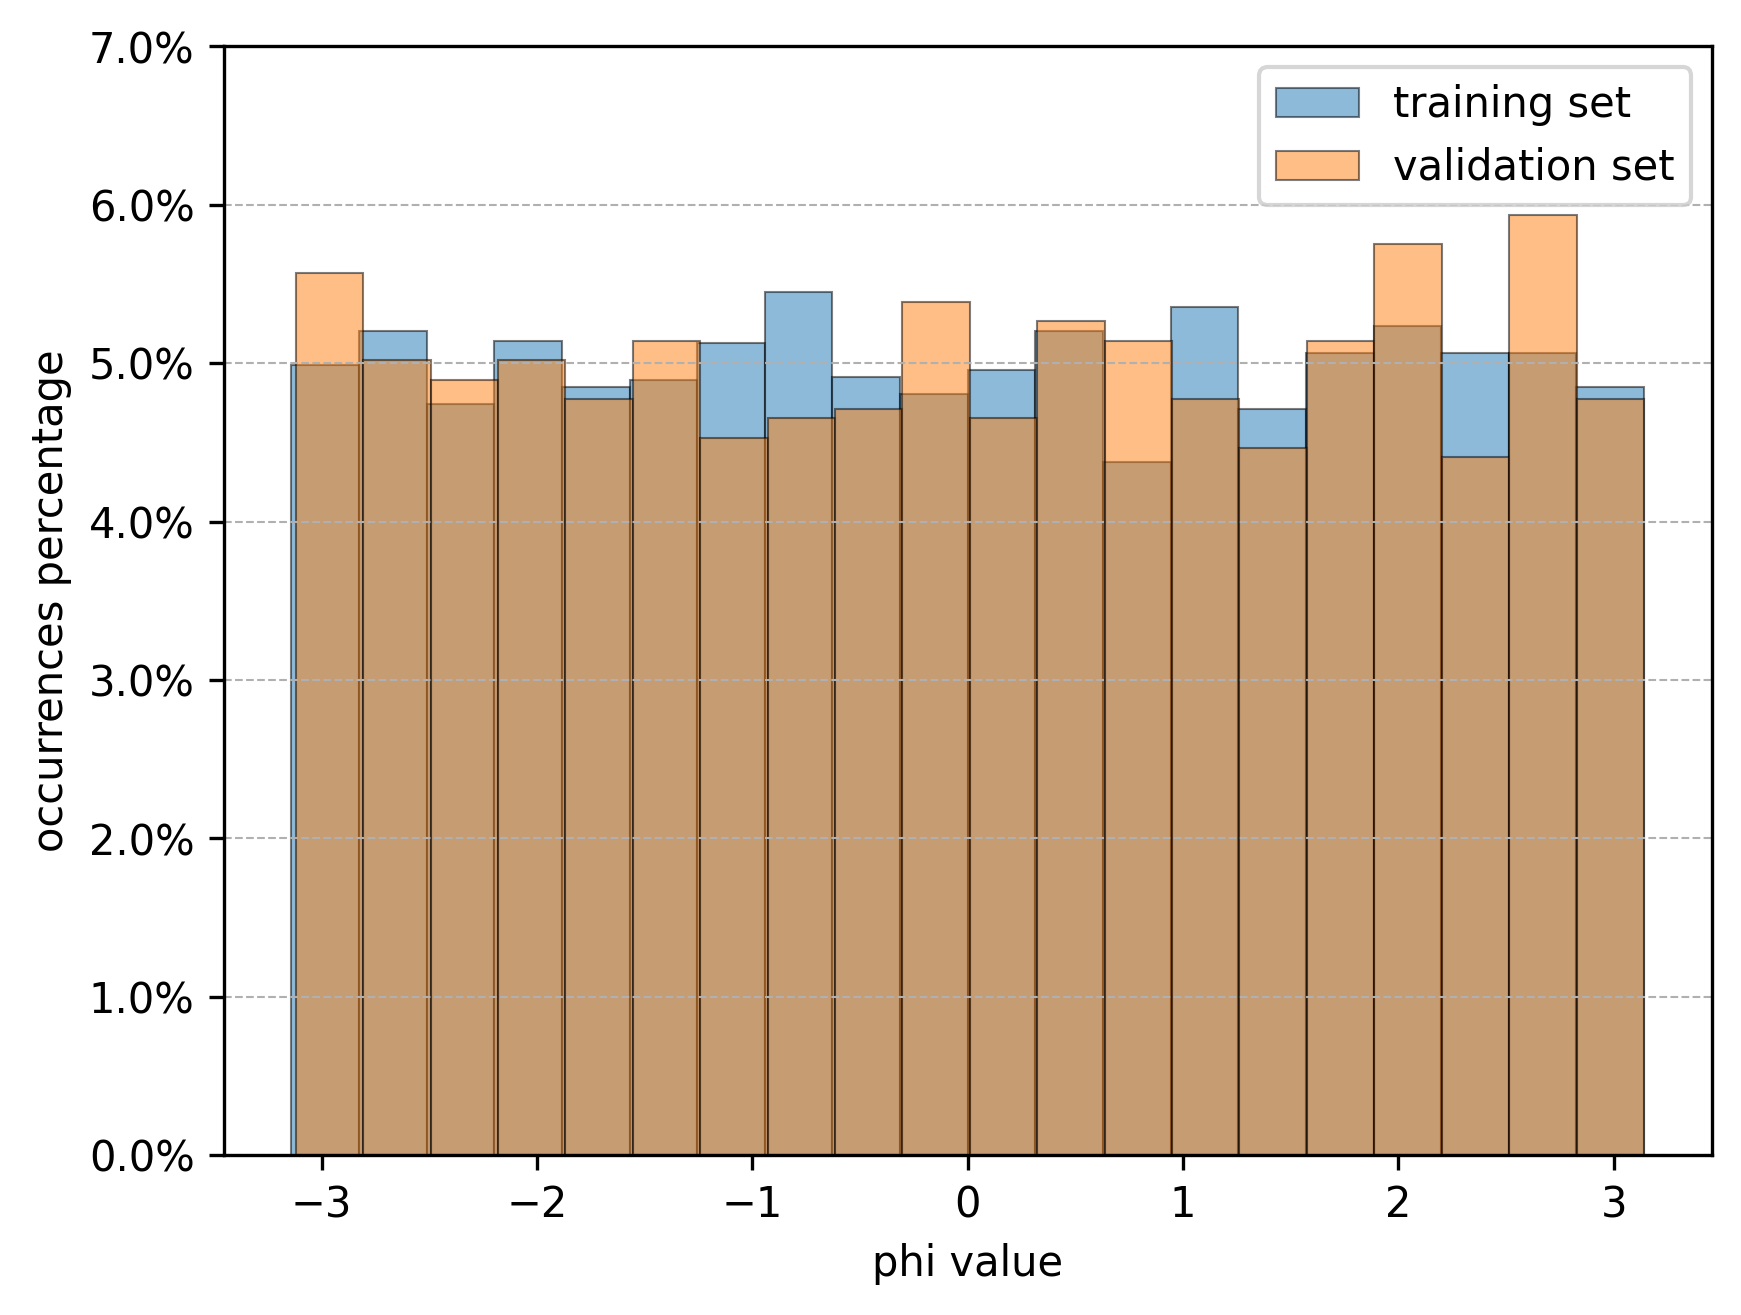

In [6]:
plot_histogram(pt, 'pt', dpi=300, ylim=7)
plot_histogram(phi, 'phi', dpi=300, ylim=7)

In [7]:
q[np.where(q == 1)]

array([1., 1., 1., ..., 1., 1., 1.])

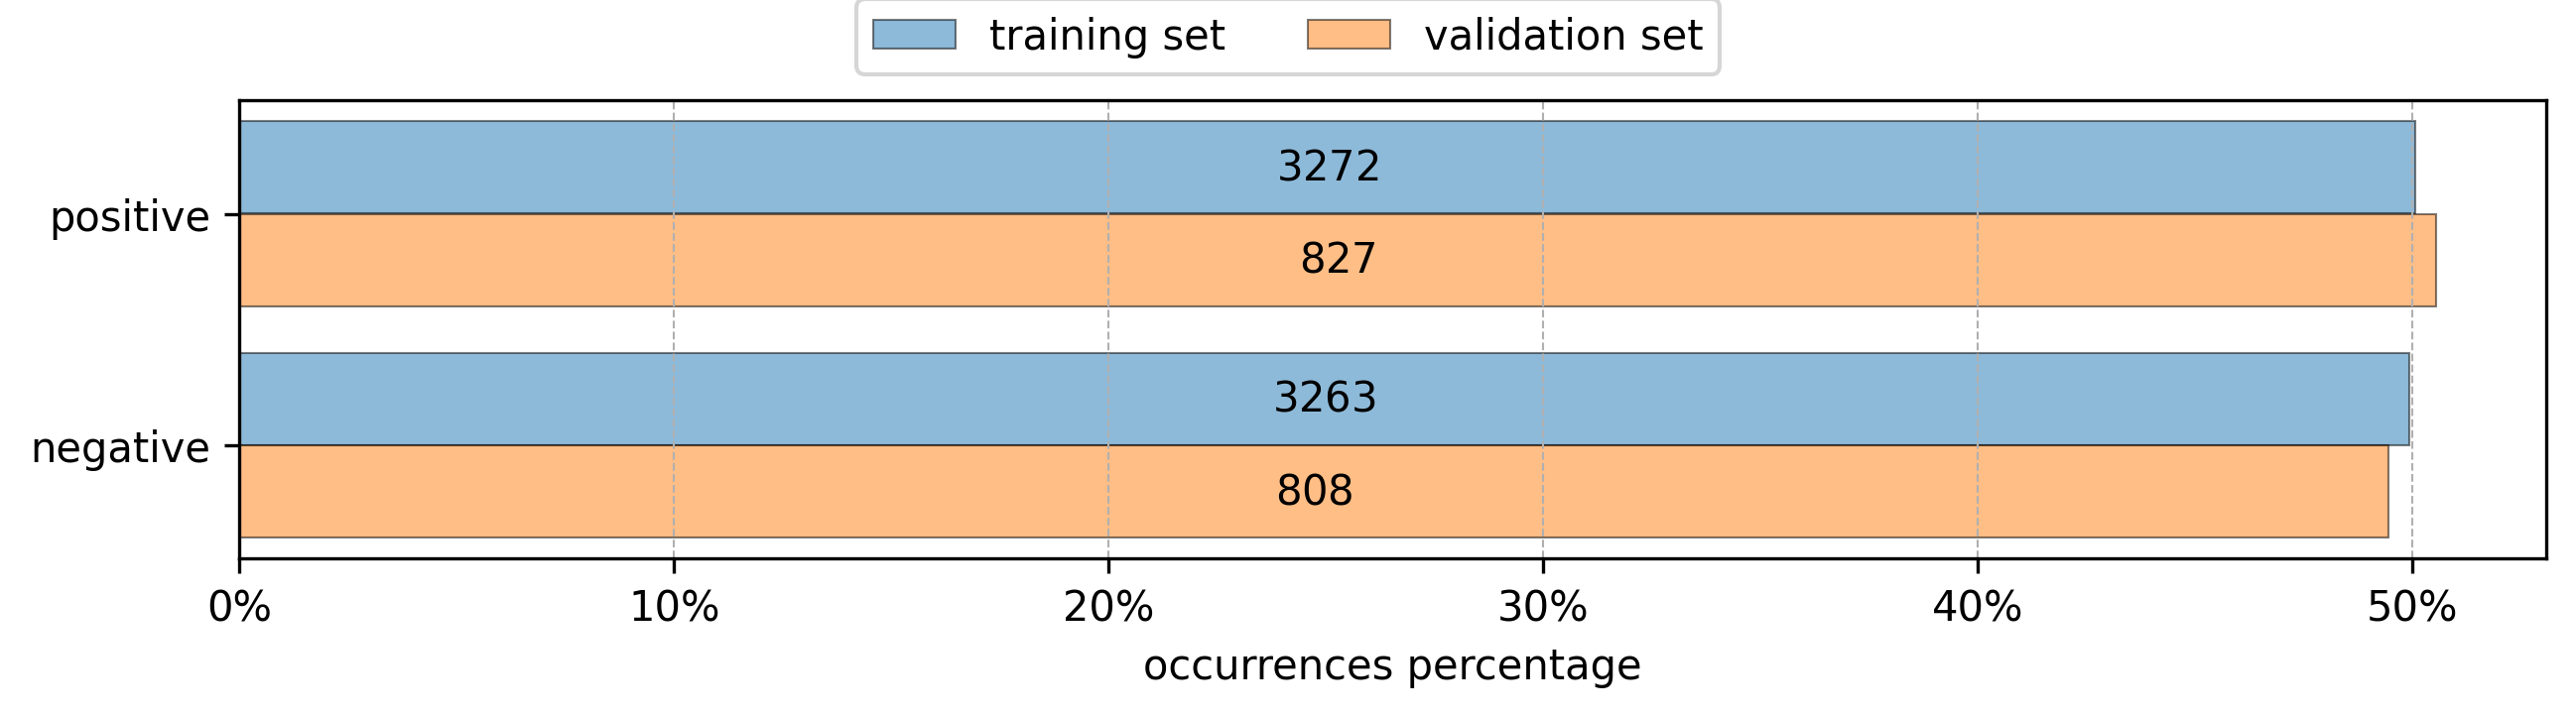

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 2))
fig.set_dpi(300)

q_train = train_set(q)
q_valid = validation_set(q)

labels = ('positive', 'negative')
q_data_train = (len(q_train[np.where(q_train == 1)])/len(q_train), len(q_train[np.where(q_train == -1)])/len(q_train))
q_data_valid = (len(q_valid[np.where(q_valid == 1)])/len(q_valid), len(q_valid[np.where(q_valid == -1)])/len(q_valid))
y_pos = np.array([0,1])

bars = ax.barh(y_pos-0.2, q_data_train, align='center', edgecolor = 'black', lw=0.5, alpha=0.5, height=0.4, label='training set')
ax.bar_label(bars, label_type='center', labels=[f'${int(np.ceil(len(q_train)*l))}$' for l in q_data_train])
bars = ax.barh(y_pos+0.2, q_data_valid, align='center', edgecolor = 'black', lw=0.5, alpha=0.5, height=0.4, label='validation set')
ax.bar_label(bars, label_type='center', labels=[f'${int(np.ceil(len(q_valid)*l))}$' for l in q_data_valid])
# ax.bar_label(bars, label_type='edge', labels=[f' {100*l:.2f}%' for l in q_data_valid])

ax.set_yticks(y_pos, labels=labels)
ax.xaxis.set_major_formatter(tick.PercentFormatter(1))
ax.invert_yaxis()
ax.grid(axis='x', linestyle='--', linewidth=0.5)
ax.set_xlabel('occurrences percentage')
# ax.legend(legend_loc='')
fig.legend(ncol=2, loc='upper center', borderaxespad=0)

plt.show()